In [163]:
# %load_ext watermark

# # python, ipython, packages, and machine characteristics
# %watermark -v -m -p pandas,numpy,matplotlib,math,scipy,itertools 

# Circulación General de la Atmósfera - 2020
Universidad Nacional de La Plata
-----------------
Facultad de Ciencias Geofísicas y Astronómicas
-----------------

Introducción al Análisis Estadístico de Series Temporales
En la Práctica N°0 trabajaremos con series temporales de temperatura y
precipitación provenientes de datos de observación de estaciones meteorológicas de las
ciudades de Corrientes (NE), Catamarca (NO) y Bahía Blanca (S), en Argentina, como así también, de la
Base Antártica Carlini. Además, utilizaremos datos satelitales de Extensión de Hielo
Marino Ártico y datos de temperatura media global. El objetivo es familiarizarnos con
datos que evolucionan en el tiempo, es decir, series temporales y poder analizarlas a través
de parámetros estadísticos básicos. De este modo, incorporaremos, a través de la
utilización de datos, los conceptos de variabilidad, extremos y tendencia.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

## **Ejercicio 1.** 
En el archivo Ej1_Corrientes se tienen datos diarios de temperatura máxima,
temperatura mínima y precipitación de la ciudad de Corrientes para el período 2011-2015.


### a. Calcular la media y el desvío estándar de la temperatura media diaria sobre el período disponible (calcular la media diaria como promedio entre temperatura mínima y máxima).

RPSTA: 

- La media es 22.14*C
- La desviacion estandar es 5.5*C

**Difference between population and a sample**

When we compute sample standard deviation we divide by N- 1 instead of only using N as we do when we compute population standard deviation.
The reason for this is that in statistics in order to get an unbiased estimator for population standard deviation when calculating it from the sample we should be using (N-1). This is called one degree of freedom, we subtract 1 in order to get an unbiased estimator.

[Fuente](https://towardsdatascience.com/why-computing-standard-deviation-in-pandas-and-numpy-yields-different-results-5b475e02d112)

In [2]:
corrientes = pd.read_excel('./data/Ej1_Corrientes.xlsx',)#skiprows=1, nrows=3,
corrientes

AÑO  MES  DIA    PP  TMAX  TMIN
0     2011    1    1   0.0  31.3  19.3
1     2011    1    2   4.5  30.3  19.4
2     2011    1    3   0.0  32.6  19.2
3     2011    1    4   0.0  33.8  20.1
4     2011    1    5   0.0  32.4  21.5
...    ...  ...  ...   ...   ...   ...
1821  2015   12   27   0.0  33.0  25.0
1822  2015   12   28  29.5  31.6  24.2
1823  2015   12   29   8.0  30.5  23.3
1824  2015   12   30   0.0  33.9  24.8
1825  2015   12   31  23.4  30.1  22.0

[1826 rows x 6 columns]

In [3]:
corrientes.columns = ['year', 'month', 'day', 'pp', 'tmax', 'tmin']
#print(corrientes.columns)
corrientes['fecha']= pd.to_datetime(corrientes[['year','month','day']]) # puede ser un dict tbn
corrientes = corrientes.set_index('fecha') 
corrientes.drop(['year', 'month', 'day'], axis=1, inplace=True)
#corrientes

In [4]:
corrientes['tmean']= (corrientes.tmax + corrientes.tmin)/2
#corrientes

In [5]:
corrientes.isna().sum()

pp       0
tmax     0
tmin     0
tmean    0
dtype: int64

In [6]:
corrientes.describe()

pp         tmax         tmin        tmean
count  1826.000000  1826.000000  1826.000000  1826.000000
mean      3.672399    27.580120    16.701314    22.140717
std      11.767282     6.004629     5.545108     5.456710
min       0.000000     9.600000    -1.100000     5.600000
25%       0.000000    23.625000    13.200000    18.612500
50%       0.000000    28.300000    17.500000    22.700000
75%       0.100000    31.975000    20.700000    26.100000
max     147.900000    42.000000    28.600000    34.700000

**pd.std()** function return sample standard deviation over requested axis. By default the standard deviations are normalized by N-1. It is a measure that is used to quantify the amount of variation or dispersion of a set of data values. 

In [7]:
corrientes.tmean.std(ddof=1,)

5.4567103422305765

### b. Graficar dicha temperatura media diaria. Remover la alta frecuencia con un promedio móvil de 20 días.

fecha
2011-01-01        NaN
2011-01-02        NaN
2011-01-03        NaN
2011-01-04        NaN
2011-01-05        NaN
               ...   
2015-12-27    26.3425
2015-12-28    26.4600
2015-12-29    26.5600
2015-12-30    26.8575
2015-12-31    26.9200
Name: trolling, Length: 1826, dtype: float64


Text(0, 0.5, '*C')

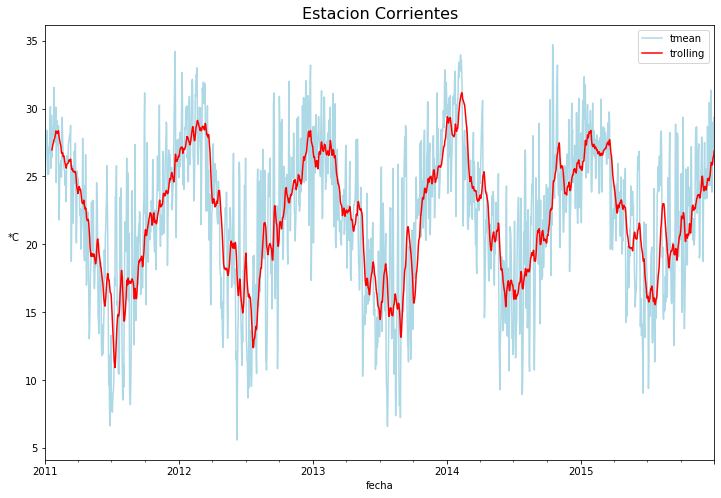

In [8]:
corrientes['trolling']= corrientes.tmean.rolling(20).mean()
print(corrientes['trolling'])

corrientes[['tmean','trolling']].plot(figsize=(12,8), color=['lightblue','r'])
plt.title('Estacion Corrientes', fontdict={'size':16})
plt.ylabel('*C',rotation=0, labelpad=12)

### c. Graficar la precipitación diaria. Identificar el día del evento de precipitación más extremo durante este período.

RSPTA: 

- La fecha del 1 de noviembre del 2013 presenta la mayor precipitacion 147.9 mm 

fecha
2013-11-01    147.9
Name: pp, dtype: float64


Text(0, 0.5, 'mm/dia')

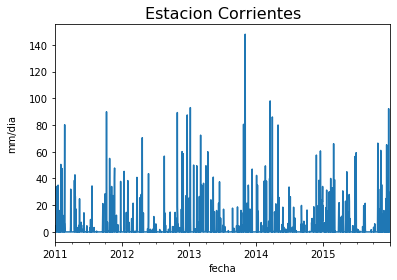

In [135]:
print(corrientes['pp'][corrientes.pp==corrientes.pp.max()])
#print('precipitacion mas extrema: ',corrientes.pp.max())
corrientes.pp.plot()
plt.title('Estacion Corrientes', fontdict={'size':16})
plt.ylabel('mm/dia', labelpad=12)

## **Ejercicio 2.** 
En el archivo Ej2_Catamarca se tienen datos diarios de temperatura máxima,
mínima y media de la ciudad de San Fernando del Valle de Catamarca. Los datos van
desde el 1° de julio de 2018 al 28 de febrero de 2019.


### a. Calcular la temperatura media de la primavera de 2018 (tomar como primavera los meses de SON).

RSPTA:

 - la temperatura media  es de 19.6*C

In [10]:
catamarca = pd.read_excel('./data/Ej2_Catamarca.xlsx',)#skiprows=1, nrows=3,
catamarca

MES  Días  Temp. Máx\n°C  Temp. Min\n°C  Temp. Med\n°C
0    JULIO     1           14.8           12.0           14.0
1      NaN     2           13.0            9.0           11.0
2      NaN     3           14.8            1.8            8.3
3      NaN     4           11.0            5.9            7.5
4      NaN     5            9.0            6.6            7.5
..     ...   ...            ...            ...            ...
238    NaN    24           27.6           21.8           27.4
239    NaN    25           23.5           18.6           22.4
240    NaN    26           23.2           17.2           20.2
241    NaN    27           28.4           13.3           20.2
242    NaN    28           34.4           14.6           24.1

[243 rows x 5 columns]

In [11]:
catamarca['fecha']=pd.date_range(start='2018-07-01',end='2019-02-28',freq='1D')
catamarca.columns= ['mes', 'dia', 'tmax', 'tmin','tmean','fecha']
catamarca.drop(['mes', 'dia'], axis=1, inplace=True)
catamarca.set_index('fecha', inplace=True)
print(catamarca.info())
catamarca

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 243 entries, 2018-07-01 to 2019-02-28
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tmax    243 non-null    float64
 1   tmin    243 non-null    float64
 2   tmean   243 non-null    float64
dtypes: float64(3)
memory usage: 7.6 KB
None


tmax  tmin  tmean
fecha                        
2018-07-01  14.8  12.0   14.0
2018-07-02  13.0   9.0   11.0
2018-07-03  14.8   1.8    8.3
2018-07-04  11.0   5.9    7.5
2018-07-05   9.0   6.6    7.5
...          ...   ...    ...
2019-02-24  27.6  21.8   27.4
2019-02-25  23.5  18.6   22.4
2019-02-26  23.2  17.2   20.2
2019-02-27  28.4  13.3   20.2
2019-02-28  34.4  14.6   24.1

[243 rows x 3 columns]

In [12]:
catamarca_mean_mes= catamarca.groupby([catamarca.index.year,catamarca.index.month]).mean()
#catamarca_mean_mes.loc[[(2018,i) for i in range(9,12)]].mean() #count()
catamarca_mean_mes.loc[(slice(None), slice(9,11),), :].mean()['tmean'] #slice(None)

19.56351254480286

### b. Calcular la temperatura máxima media y mínima media del verano 2019 (tomar como verano los meses de DEF).

RSPTA:

- La temperatura minima es de 20.3*C
- La temperatura maxima es de 32.7*C

In [145]:
catamarca_mean_mes= catamarca.groupby([catamarca.index.year,catamarca.index.month]).mean()
catamarca_mean_mes.loc[(slice(None), [12,1,2],), :].mean()[['tmin','tmax']] #slice(None)

tmin    20.285138
tmax    32.683602
dtype: float64


### c. Graficar la temperatura media diaria para todo el período disponible. ¿Qué observa en el transcurso de los meses?

RSPTA:
- Por la ubicacion la temperatura media deberia alcanzar sus minimos valores durante el invierno del Hemisferio Sur. La temperatura media diaria disminuye abruptamente durante setiembre probablemente debido a la ocurrencia de dos fuertes incursiones de masas de aire polar.

Text(0, 0.5, '*C')

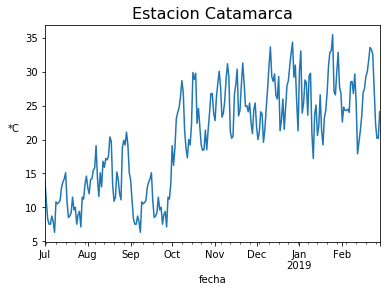

In [14]:
catamarca['tmean'].plot()
plt.title('Estacion Catamarca', fontdict={'size':16})
plt.ylabel('*C',rotation=0, labelpad=12)

### d. Graficar la temperatura máxima y mínima diaria en un mismo gráfico. ¿Qué puede observar respecto a la amplitud térmica diaria?

RSPTA:

- La amplitud termica diaria es mayor los mese de Julio, Agosto y Setiembre acortandose hacia el verano del HS.

Text(0, 0.5, '*C')

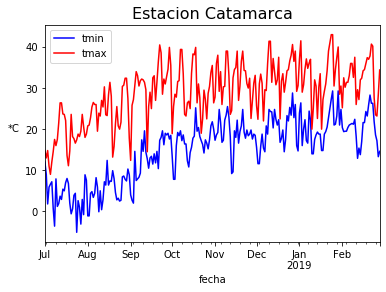

In [149]:
catamarca[['tmin','tmax']].plot(color=['blue','red'])
#(catamarca.tmax-catamarca.tmin).plot()
plt.title('Estacion Catamarca', fontdict={'size':16})
plt.ylabel('*C',rotation=0, labelpad=12)

## Ejercicio 3. 
En el archivo Ej3_BahiaBlanca se tienen datos mensuales de precipitación de la ciudad de Bahía Blanca, Provincia de Buenos Aires, para el período 1860-2016.


### a. Calcular la media para cada año y graficar los valores anuales para todo el período disponible.

Searching for station nr 87750 in v2.temperature.inv
BAHIA BLANCA (ARGENTINA)
coordinates: -38.73N.  -62.25E.   83m
WMO station code: 87750 BAHIA_BLANCA
prcp from v2.prcp [mm/month]

In [16]:
bahiablanca = pd.read_csv('./data/Ej3_BahiaBlanca_mod.csv', skiprows=5, header=None, names=['year','Jan','Feb','Mar','Abr','May','Jun','Jul','Aug','Set','Oct','Nov','Dec'], index_col='year', decimal=',')
bahiablanca

Jan    Feb    Mar    Abr    May    Jun    Jul   Aug    Set    Oct  \
year                                                                        
1865   22.4  100.8   54.2   97.5    6.3 -999.9    3.7  33.1   34.4   64.9   
1866   10.2   79.7  133.5   26.0   16.6   42.3    0.0  53.5   36.7   31.9   
1867   18.6   38.1    4.5   61.9    9.5   17.2    0.0   9.3   28.3   40.7   
1868   16.4   90.7   25.6   15.0    1.0   50.3    0.5  41.0  147.9   49.1   
1869   16.3  109.8   59.7    0.0    3.7    0.2    1.3   1.8   80.7   93.1   
...     ...    ...    ...    ...    ...    ...    ...   ...    ...    ...   
2012   34.0   39.0   70.0   13.0   26.0   12.0 -888.8  89.0   17.0   32.0   
2013   54.0   57.0   57.0   52.0    6.0 -888.8   69.0   4.0   84.0   94.0   
2014   13.0   85.0   95.0  120.0   73.0   35.0   90.0  47.0   47.0  174.0   
2015  111.0  111.0   68.0   72.0   43.0    2.0   24.0  75.0   13.0   66.0   
2016  117.0   58.0   45.0   36.0  112.0   22.0   19.0   8.0    9.0 -999.9   

        Nov    Dec  
year                
1865   32.0   56.2  
1866   27.8   18.1  
1867   23.6   59.9  
1868   37.7   80.4  
1869   68.0   30.0  
...     ...    ...  
2012   75.0  105.0  
2013   22.0   38.0  
2014   49.0   16.0  
2015   45.0   28.0  
2016 -999.9 -999.9  

[152 rows x 12 columns]

In [17]:
ind= pd.date_range('01-1865','12-2016',freq='1MS')
val= pd.Series(bahiablanca.values.ravel('F')).values
bahiablanca= pd.DataFrame(val, index=ind, columns=['prcp'])
bahiablanca[bahiablanca.prcp<0]= np.nan
bahiablanca#.head(12)

prcp
1865-01-01   22.4
1865-02-01   10.2
1865-03-01   18.6
1865-04-01   16.4
1865-05-01   16.3
...           ...
2016-08-01  105.0
2016-09-01   38.0
2016-10-01   16.0
2016-11-01   28.0
2016-12-01    NaN

[1824 rows x 1 columns]

In [18]:
# bahiablanca.prcp.groupby(pd.Grouper(freq='Y')).mean()
# bahiablanca.prcp.resample('Y').mean()
bahiablanca.prcp.groupby([(bahiablanca.index.year)]).mean()

1865    29.941667
1866    60.650000
1867    46.016667
1868    61.350000
1869    56.166667
          ...    
2012    68.250000
2013    67.000000
2014    59.050000
2015    85.454545
2016    50.800000
Name: prcp, Length: 152, dtype: float64

Text(0.5, 0, 'fecha')

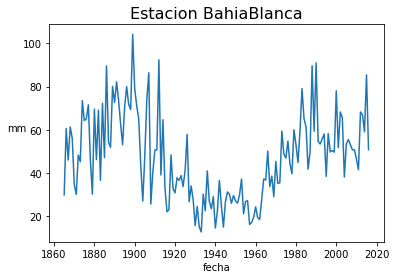

In [150]:
bahiablanca.prcp.groupby([(bahiablanca.index.year)]).mean().plot()
plt.title('Estacion BahiaBlanca', fontdict={'size':16})
plt.ylabel('mm',rotation=0, labelpad=6)
plt.xlabel('fecha',rotation=0, labelpad=3)

### b. Calcular la media de todo el período y, a partir de ese valor, construir una serie de anomalías. Graficarla. ¿Qué observa? ¿Cuál sería el período base?

RSPTA:

- Se observan menores valores para el periodo 1920-1970.
- Lo mejor seria escoger todo el periodo. 

clima:  47.25370813397129


Text(0.5, 0, 'fecha')

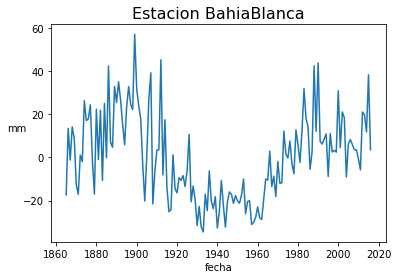

In [151]:
clima= bahiablanca.prcp.groupby([(bahiablanca.index.year)]).mean().mean()
print('clima: ',clima)
anom = bahiablanca.prcp.groupby([(bahiablanca.index.year)]).mean() - clima
anom.plot()
plt.title('Estacion BahiaBlanca', fontdict={'size':16})
plt.ylabel('mm',rotation=0, labelpad=6)
plt.xlabel('fecha',rotation=0, labelpad=3)

### c. Calcular los percentiles 90 y 99 para la precipitación de verano (DEF). ¿Qué veranos consideraría extremos lluviosos?

RSPTA:

- Los veranos extremos lluviosos superarian el percentil 90, considerando la cantidad de datos.

In [21]:
#bahiablanca[np.in1d(bahiablanca.index.month, [12, 1, 2])]
season = ((bahiablanca.index.month % 12 + 3) // 3).map({1:'DJF', 2: 'MAM', 3:'JJA', 4:'SON'})
season

# month_to_season_dct = {
#     1: 'DJF', 2: 'DJF',
#     3: 'MAM', 4: 'MAM', 5: 'MAM',
#     6: 'JJA', 7: 'JJA', 8: 'JJA',
#     9: 'SON', 10: 'SON', 11: 'SON',
#     12: 'DJF'
# }
# ind_season = [month_to_season_dct.get(t_stamp.month) for t_stamp in bahiablanca_per.index]

bahiablanca['season']= season
bahiablanca_summer = bahiablanca[season == 'DJF']

In [22]:
bahiablanca_summer_periodo= bahiablanca_summer['1865-12-01':'2016-02-01']
import itertools
#it = itertools.repeat(1,3)
n_season= [j for i in range(1+1865,int(1865+(len(bahiablanca_summer_periodo)+3)/3)) for j in list(itertools.repeat(i,3))]
bahiablanca_summer_periodo['n_season']= n_season
bahiablanca_summer_periodo

<ipython-input-22-26cf269796d5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bahiablanca_summer_periodo['n_season']= n_season


prcp season  n_season
1865-12-01    3.5    DJF      1866
1866-01-01   59.7    DJF      1866
1866-02-01  185.2    DJF      1866
1866-12-01    0.0    DJF      1867
1867-01-01   77.0    DJF      1867
...           ...    ...       ...
2015-01-01   51.0    DJF      2015
2015-02-01  147.0    DJF      2015
2015-12-01  211.0    DJF      2016
2016-01-01    NaN    DJF      2016
2016-02-01   95.0    DJF      2016

[453 rows x 3 columns]

In [25]:
bahiablanca_summer_periodo_extremo= bahiablanca_summer_periodo.groupby('n_season').sum()
p90= bahiablanca_summer_periodo_extremo.quantile(0.9)
p90
p99= bahiablanca_summer_periodo_extremo.quantile(0.99)
p99

prcp    455.0
Name: 0.99, dtype: float64

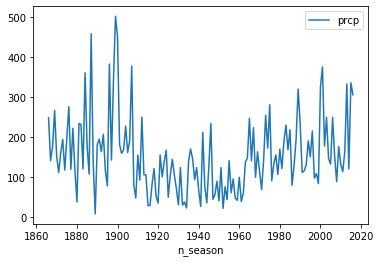

In [153]:
bahiablanca_summer_periodo_extremo.plot()

In [26]:
bahiablanca_summer_p90 = bahiablanca_summer_periodo_extremo[['prcp']].where(bahiablanca_summer_periodo_extremo[['prcp']]>p90).dropna(axis=0)
bahiablanca_summer_p99 = bahiablanca_summer_periodo_extremo[['prcp']].where(bahiablanca_summer_periodo_extremo[['prcp']]>p99).dropna(axis=0)
#bahiablanca_summer_periodo_extremo[['prcp']].mask(bahiablanca_summer_periodo_extremo[['prcp']]>p90,0)
print(bahiablanca_summer_p99)

           prcp
n_season       
1887      459.0
1899      503.0


In [154]:
print(bahiablanca_summer_p90)

           prcp
n_season       
1876      276.0
1884      361.0
1887      459.0
1896      383.0
1898      343.0
1899      503.0
1900      451.0
1907      378.0
1975      281.0
1989      320.3
2000      325.0
2001      376.0
2013      333.0
2015      336.0
2016      306.0


### d. ¿Cómo harías para definir veranos extremos secos? ¿Por qué?

RSPTA:

- Utilizaria el percentil 10 para ubicar los anios con menores precipitaciones

In [155]:
p01= bahiablanca_summer_periodo_extremo.quantile(0.01)
p10= bahiablanca_summer_periodo_extremo.quantile(0.1)
bahiablanca_summer_p01 = bahiablanca_summer_periodo_extremo[['prcp']].where(bahiablanca_summer_periodo_extremo[['prcp']]<p01).dropna(axis=0)
bahiablanca_summer_p10 = bahiablanca_summer_periodo_extremo[['prcp']].where(bahiablanca_summer_periodo_extremo[['prcp']]<p10).dropna(axis=0)
print(bahiablanca_summer_p01)
print(bahiablanca_summer_p10)

          prcp
n_season      
1889       7.0
1952      21.0
          prcp
n_season      
1880      37.0
1889       7.0
1915      28.0
1916      27.7
1920      34.0
1930      29.5
1932      29.0
1933      37.0
1934      22.0
1941      25.7
1944      34.7
1950      40.0
1952      21.0
1959      41.0
1961      38.0


## Ejercicio 4
En el archivo Ej4_Carlini se tienen datos de temperatura estacionales de verano (DEF) e invierno (JJA) de la Base Antártica Argentina Carlini para el período 1986-2015.


### a. Calcular la media y el desvío estándar para verano e invierno.

RSPTA:

- La respuesta se ubica en la 2da y 3ra columna tabla de abajo

In [28]:
carlini=pd.read_excel('./data/Ej4_Carlini.xls', skiprows=1, skipfooter=2)
#carlini.set_index('AÑO') #.columns #df.index.dt.year
indy= pd.date_range(str(carlini['AÑO'].values[0]),str(carlini['AÑO'].values[-1]+1), freq='Y')
carlini= carlini.set_index(indy) 
#carlini.index= carlini.index#.year
carlini.drop('AÑO', axis=1, inplace=True)
carlini.describe().T

count      mean       std        min       25%       50%  \
TEMP INVIERNO (JJA)   30.0 -5.696667  1.936983 -10.066667 -7.058333 -5.500000   
TEMP VERANO (DEF)     30.0  1.782222  0.568370   0.533333  1.341667  1.916667   

                          75%       max  
TEMP INVIERNO (JJA) -4.158333 -1.566667  
TEMP VERANO (DEF)    2.200000  2.566667

### b. Graficar ambas series temporales.

Text(0.5, 0, 'fecha')

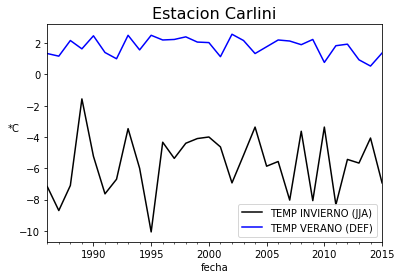

In [29]:
carlini.plot(color=['black','b'])
plt.title('Estacion Carlini', fontdict={'size':16})
plt.ylabel('*C',rotation=0, labelpad=6)
plt.xlabel('fecha',rotation=0, labelpad=3)

### c. ¿Cuál de las dos estaciones del año presenta mayor variabilidad? ¿De qué tipo de variabilidad se trata en escala temporal?

RSPTA:
- La mayor variabilidad se presenta en la estacion de invierno.
- De escala interanual

In [30]:
carlini.describe().T

count      mean       std        min       25%       50%  \
TEMP INVIERNO (JJA)   30.0 -5.696667  1.936983 -10.066667 -7.058333 -5.500000   
TEMP VERANO (DEF)     30.0  1.782222  0.568370   0.533333  1.341667  1.916667   

                          75%       max  
TEMP INVIERNO (JJA) -4.158333 -1.566667  
TEMP VERANO (DEF)    2.200000  2.566667

### d. Analizar la tendencia sobre ambas series y expresarla en °C/década.

RSPTA:

- La tendencia para los inviernos del periodo 1986-2015 es de 0.18*C por decada, es decir, los valores de temperatura promedio invernal aumentaria en este valor por decada. 
- La tendencia para los veranos del periodo 1986-2015 es de -0.13*C por decada, es decir, los valores de temperatura promedio de verano disminuiria en este valor por decada. 

In [31]:
carlini.head(5)

TEMP INVIERNO (JJA)  TEMP VERANO (DEF)
1986-12-31            -7.166667           1.333333
1987-12-31            -8.700000           1.166667
1988-12-31            -7.100000           2.166667
1989-12-31            -1.566667           1.633333
1990-12-31            -5.233333           2.466667

slope: 0.017642    intercept: -40.989136
R-squared: 0.006429


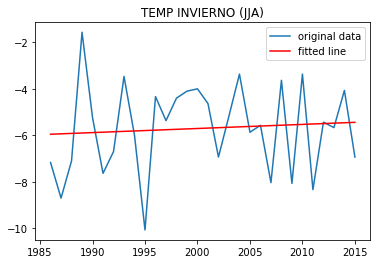

Para el periodo  TEMP INVIERNO (JJA)  la tendencia decadal es :  0.18 *C
slope: -0.013378    intercept: 28.544566
R-squared: 0.042935


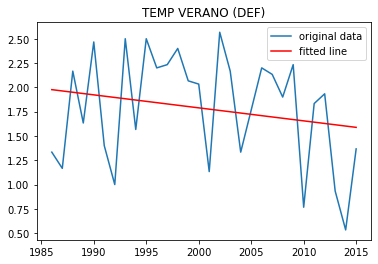

Para el periodo  TEMP VERANO (DEF)  la tendencia decadal es :  -0.13 *C


In [32]:
from scipy import stats
for i in range(2):
  slope, intercept, r_value, p_value, std_err = stats.linregress(np.arange(carlini.index.year[0], carlini.index.year[-1]+1),carlini[carlini.columns[i]].values)
  print("slope: %f    intercept: %f" % (slope, intercept))

  print("R-squared: %f" % r_value**2)

  plt.plot(np.arange(carlini.index.year[0], carlini.index.year[-1]+1),carlini[carlini.columns[i]], '-', label='original data')
  plt.plot(np.arange(carlini.index.year[0], carlini.index.year[-1]+1), intercept + slope*np.arange(carlini.index.year[0], carlini.index.year[-1]+1), 'r', label='fitted line')
  plt.title(carlini.columns[i])
  plt.legend()
  plt.show()

  print('Para el periodo ', carlini.columns[i], ' la tendencia decadal es : ',  '%.2f'%(slope*10), '*C')
  print("=====================================================================")

#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

## Ejercicio 5
En el archivo Ej5_SeaIceExtent se tienen datos de Extensión de Hielo Marino (Sea Ice Extent) del Hemisferio Norte del mes de Julio y del mes de Septiembre para el período 1979-2019, así como también sus anomalías.

### a. Calcular el desvío estándar de la serie de valores medios para el mes de julio.

RSPTA:

- La desviacion estandar es 0.939655

July Northern Hemisphere Sea Ice Extent (1979-2020)

Units: million square km

1981-2010 Mean: 9.47


In [33]:
seaice = pd.read_excel('./data/Ej5_SeaIceExtent.xlsx', sheet_name='July', skiprows=3)
seaice= seaice[seaice.columns[0:3]]
indy= pd.date_range(str(seaice['Date'].values[0]),str(seaice['Date'].values[-1]+1), freq='Y')
seaice= seaice.set_index(indy) 
seaice.drop('Date', axis=1, inplace=True)
print(seaice.head(5))
seaice.describe().T


            Value  Anomaly
1979-12-31  10.31     0.84
1980-12-31  10.10     0.63
1981-12-31  10.27     0.80
1982-12-31  10.37     0.90
1983-12-31  10.57     1.10


count     mean       std   min     25%   50%     75%    max
Value     42.0  9.13119  0.939655  7.28  8.2975  9.34  9.9675  10.57
Anomaly   42.0 -0.33881  0.939655 -2.19 -1.1725 -0.13  0.4975   1.10

### b. Graficar dicha serie y analizar la tendencia. ¿Cuál es la tendencia en km 2 /año?

RSPTA: 

- La tendencia es de -0.071 km2/año

slope: -0.070788    intercept: 150.671034
R-squared: 0.854110


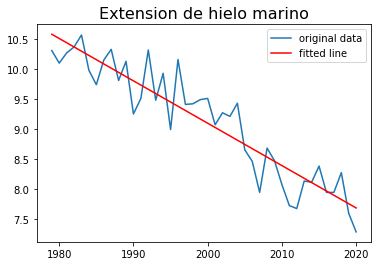

Para los meses de julio la tendencia es :  -0.071 km2/año


In [34]:
from scipy import stats
for i in list(seaice.columns[0:1]):
  slope, intercept, r_value, p_value, std_err = stats.linregress(np.arange(seaice.index.year[0], seaice.index.year[-1]+1), seaice[i].values)
  print("slope: %f    intercept: %f" % (slope, intercept))
  
  print("R-squared: %f" % r_value**2)

  plt.plot(np.arange(seaice.index.year[0], seaice.index.year[-1]+1),seaice[i].values, '-', label='original data')
  plt.plot(np.arange(seaice.index.year[0], seaice.index.year[-1]+1), intercept + slope*np.arange(seaice.index.year[0], seaice.index.year[-1]+1), 'r', label='fitted line')
  plt.title('Extension de hielo marino', fontdict={'size':16})
  plt.legend()
  plt.show()

  print('Para los meses de julio la tendencia es : ',  '%.3f'%(slope), 'km2/año')
  print("=====================================================================")


### c. Graficar la serie de anomalías.

Text(0.5, 0, 'fecha')

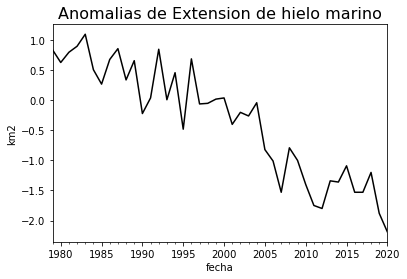

In [35]:
seaice.Anomaly.plot(color=['black','b'])
plt.title('Anomalias de Extension de hielo marino', fontdict={'size':16})
plt.ylabel('km2',labelpad=4)
plt.xlabel('fecha',rotation=0, labelpad=3)

### d. ¿Qué año cuenta con la menor extensión de superficie, es decir, con la mayor anomalía? ¿Lo puede observar en el gráfico del ítem b y del ítem c?

RSPTA:

- El 2020 cuenta con la menor extension de superficie  
- Se puede observar con ambos graficos.

In [36]:
#seaice.min()
min_seaice = seaice.idxmin(axis=0, skipna=True)#['Anomaly']
print('indices:')
print(min_seaice)
print('=======================')
print('valores:')
print(seaice.min())
print('=======================')
print('RPTA: El 2020 cuenta con la menor extension de superficie  \nY se puede observar con ambos graficos.')

indices:
Value     2020-12-31
Anomaly   2020-12-31
dtype: datetime64[ns]
valores:
Value      7.28
Anomaly   -2.19
dtype: float64
RPTA: El 2020 cuenta con la menor extension de superficie  
Y se puede observar con ambos graficos.


### e. Repetir todos los ítems anteriores para el mes de Septiembre (este mes es el que presenta el mínimo anual cada año).

         count      mean       std   min   25%   50%   75%   max
Value     41.0  6.067317  1.116246  3.57  5.21  6.14  7.05  7.67
Anomaly   41.0 -0.342683  1.116246 -2.84 -1.20 -0.27  0.64  1.26
slope: -0.082436    intercept: 170.855962
R-squared: 0.782638


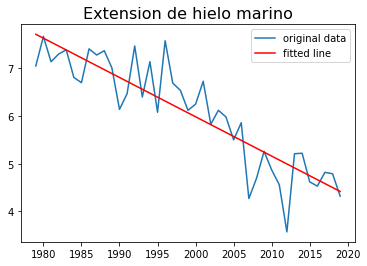

Para los meses de setiembre la tendencia es :  -0.082 km2/año


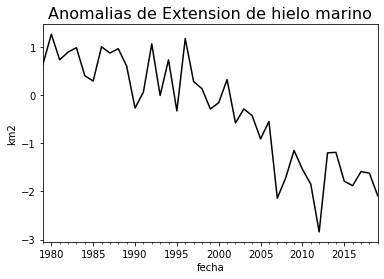

indices:
Value     2012-12-31
Anomaly   2012-12-31
dtype: datetime64[ns]
valores:
Value      3.57
Anomaly   -2.84
dtype: float64
RPTA: El 2012 cuenta con la menor extension de superficie  
Y se puede observar con ambos graficos.


In [37]:
seaice = pd.read_excel('./data/Ej5_SeaIceExtent.xlsx', sheet_name='September', skiprows=3)
seaice= seaice[seaice.columns[0:3]]
indy= pd.date_range(str(seaice['Date'].values[0]),str(seaice['Date'].values[-1]+1), freq='Y')
seaice= seaice.set_index(indy) 
seaice.drop('Date', axis=1, inplace=True)
#print(seaice.head(5))
print(seaice.describe().T)
print("==========================================================================================")

from scipy import stats
for i in list(seaice.columns[0:1]):
  slope, intercept, r_value, p_value, std_err = stats.linregress(np.arange(seaice.index.year[0], seaice.index.year[-1]+1), seaice[i].values)
  print("slope: %f    intercept: %f" % (slope, intercept))
  
  print("R-squared: %f" % r_value**2)

  plt.plot(np.arange(seaice.index.year[0], seaice.index.year[-1]+1),seaice[i].values, '-', label='original data')
  plt.plot(np.arange(seaice.index.year[0], seaice.index.year[-1]+1), intercept + slope*np.arange(seaice.index.year[0], seaice.index.year[-1]+1), 'r', label='fitted line')
  plt.title('Extension de hielo marino', fontdict={'size':16})
  plt.legend()
  plt.show()

  print('Para los meses de setiembre la tendencia es : ',  '%.3f'%(slope), 'km2/año')
  print("=====================================================================")

print("==========================================================================================")
seaice.Anomaly.plot(color=['black','b'])
plt.title('Anomalias de Extension de hielo marino', fontdict={'size':16})
plt.ylabel('km2',labelpad=4)
plt.xlabel('fecha',rotation=0, labelpad=3)
plt.show()

print("==========================================================================================")
min_seaice = seaice.idxmin(axis=0, skipna=True)#['Anomaly']
print('indices:')
print(min_seaice)
print('=======================')
print('valores:')
print(seaice.min())
print('=======================')
print('RPTA: El 2012 cuenta con la menor extension de superficie  \nY se puede observar con ambos graficos.')

## Ejercicio 6. 
En el archivo Ej6_TempGlobal se tienen datos anuales de la temperatura media mundial, en anomalía, para el período 1880-2019.

### a. Graficar dicha serie y analizar su tendencia. ¿Cuál es el período base?

RSPTA: 

- El periodo base es 1901-2000

[Global Land and Ocean Temperature Anomalies, January-December](https://www.ncdc.noaa.gov/cag/global/time-series)

Units: Degrees Celsius

Base Period: 1901-2000

Missing: -999

slope: 0.007489    intercept: -14.533912
R-squared: 0.769286


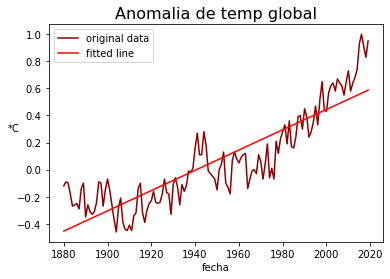

la tendencia es :  0.007 *C/año


In [38]:
tempglobal = pd.read_excel('./data/Ej6_TempGlobal.xlsx', skiprows=6)
tempglobal= tempglobal[tempglobal.columns[0:2]]
indy= pd.date_range(str(tempglobal['Year'].values[0]),str(tempglobal['Year'].values[-1]+1), freq='Y')
tempglobal= tempglobal.set_index(indy) 
tempglobal.drop('Year', axis=1, inplace=True)
# #print(seaice.head(5))

from scipy import stats
for i in list(tempglobal.columns[0:1]):
  slope, intercept, r_value, p_value, std_err = stats.linregress(np.arange(tempglobal.index.year[0], tempglobal.index.year[-1]+1), tempglobal[i].values)
  print("slope: %f    intercept: %f" % (slope, intercept))
  
  print("R-squared: %f" % r_value**2)

  plt.plot(np.arange(tempglobal.index.year[0], tempglobal.index.year[-1]+1),tempglobal[i].values, '-', label='original data', color='darkred')
  plt.plot(np.arange(tempglobal.index.year[0], tempglobal.index.year[-1]+1), intercept + slope*np.arange(tempglobal.index.year[0], tempglobal.index.year[-1]+1), 'r', label='fitted line')
  plt.title('Anomalia de temp global', fontdict={'size':16})
  plt.ylabel('*C',rotation=0, labelpad=4)
  plt.xlabel('fecha',rotation=0, labelpad=3)
  plt.legend()
  plt.show()

  print('la tendencia es : ',  '%.3f'%(slope), '*C/año')
  print("=====================================================================")


### b. ¿Cuál es el valor de la tendencia en °C/década tomando todo el período disponible?

RSPTA:

- La tendencia para todo el periodo es :  0.07 *C/decada

In [39]:
print('la tendencia para todo el periodo es : ',  '%.2f'%(slope*10), '*C/decada')

la tendencia para todo el periodo es :  0.07 *C/decada


### c. ¿Cuál es el valor de la tendencia en °C/década tomando sólo desde 1980 hasta 2019?

RSPTA:

- La tendencia para el periodo 1980-2019 es :  0.17 *C/decada

In [40]:
#tempglobal.index=tempglobal.index.to_pydatetime()
tempglobal['1980':'2019'].tail(2)

Value
2018-12-31   0.83
2019-12-31   0.95

In [41]:
slope, intercept, r_value, p_value, std_err = stats.linregress(np.arange(1980, 2020), tempglobal['1980':'2019'].Value.values)
print('la tendencia para el periodo 1980-2019 es : ',  '%.2f'%(slope*10), '*C/decada')

la tendencia para el periodo 1980-2019 es :  0.17 *C/decada


# Preguntas Teóricas:

## 1) Dé varias razones por las que la amplitud de la variación anual de la temperatura de la superficie es mayor en Siberia (Fig. 1.6).

<center><img src="./data/figura1.6.png" width=750px height=650px ></center>

Los continentes se enfrian y se calientan mucho mas rapido que los oceanos debido a que la tierra posee menor calor especifico que el agua, es decir, requiere de menor calor agregado (liberado) para aumentar (disminuir) su temperatura.

La region de siberia en particular esta ubicado en la region nororiental de Asia por lo que se esperaria una mayor variacion anual de la temperatura, al contrario de regiones costeras que tendrian una menor variacion gracias al efecto termoregulador brindado por el oceano.

La exposicion a masas de aire polares debido a los vientos oestes, que deberian tener un efecto parecido a los friajes sobre el sur de Sudamerica.

## 2) Si estáis en la cima del Monte Everest a 8848 m, ¿aproximadamente qué fracción de masa de la atmósfera está debajo de vosotros? (Utilice la ecuación (1.6).)

<center><img src="/data/rspta_2.png" width=750px height=650px ></center>

In [106]:
def presatp(z, H=7600, ps=1.01325*10**5):
    import math
    p=ps*math.e**(-1*z/H)
    return(p)

mt= 1.03*10**4 # aprox usando g=10 .... ps/g

p=presatp(z=8848)#s*math.e**(-1*z/H)
print('presion a 8848m : %.2f hPa' %p)

ps=1.01325*10**5
dm = (ps-p)/9.81
print('masa atmosferica sobre entre 2 niveles de presion: %.2f Kg m⁻²' %dm)

frac= dm/mt
print('Porcentaje de Fraccion de masa de la atmosfera %.2f :' %(frac*100))

presion a 8848m : 31630.53 hPa
masa atmosferica sobre entre 2 niveles de presion: 7104.43 Kg m⁻²
Porcentaje de Fraccion de masa de la atmosfera 68.98 :


## 3) Un avión está volando a 10.000 m sobre la superficie. ¿Cuál es la presión fuera del avión en hectopascales? ¿Cuál es la temperatura en grados centígrados? Utilice los promedios globales.

<center><img src="./data/rspta_3.png" width=750px height=650px ></center>

In [111]:
import math

p=presatp(z=10000)
print('%.2f Pa' %p)
######################
T= 288-65 # USING LAPSE RATE -6.5*C/Km 
print('%.2f K' %T)

27181.69 Pa
223.00 K


## 4) Si la atmósfera se calentara 5°C, ¿la presión atmosférica a 5 km sobre el nivel del mar aumentaría o disminuiría, y en aproximadamente cuánto? (Utilice la ecuación (1.6).)

<center><img src="./data/rspta_4.png" width=750px height=650px ></center>

In [116]:
Hi=287*260/9.81
Hf=287*265/9.81

print('Hf = %.2f' %Hf)

ps=1.01325*10**5
Hi=7600
Hf=7750
z=5000

pi=presatp(z=5000,H=Hi)
print('presion inicial: %.2f Pa' %pi)

pf=presatp(z=5000,H=Hf)
print('presion final: %.2f Pa' %pf)

df= pf-pi
print('La presion a 5km aumentaria %.2f' %df)

Hf = 7752.80
presion inicial: 52480.33 Pa
presion final: 53152.86 Pa
La presion a 5km aumentaria 672.53


## 5) Calcular la diferencia de la presión de vapor de saturación entre 0°C y 30°C. Compare los resultados obtenidos con las ecuaciones (1.10) y (1.11). 

El resultado en hPa

<center><img src="./data/rspta_5.png" width=750px height=650px ></center>

In [120]:
es= 6.11*math.e**( (2.5*(10**6)/461.51)*(1/273 - 1/303) )
print('es a 303K: %.2f hPa' %es)

print('des entre 273K y 303K = %.2f hPa' %(es-6.11))

es a 303K: 43.58 hPa
des entre 273K y 303K = 37.47 hPa


## 6) Explique por qué la inversión de la temperatura del polo norte está presente en invierno pero no en verano.

Porque la superficie del polo se enfria eficientemente emitiendo radiacion infrarroja durante la noche polar. Y por otro lado, el aire no emite la radiacion tan eficientemente como la superficie, y el calor transportado hacia el polo mantiene la parte inferior de la troposfera mas caliente que la superficie.

## 7) ¿Por qué cree que la salinidad a 45°N-180°E es mucho menor que la salinidad a 25°N-180°E (Fig. 1.12)?

<center><img src="./data/figura1.12.png" width=750px height=650px ></center>

La figura 12 muestra que tal diferencia se da hasta los 500 m de profundidad. La salinidad a 25N es mayor debido a que la evaporacion supera a la precipitacion dejando el agua enriquecida de sales, y por el contrario, la precipitacion supera a la evaporacion en latitudes medias ocasionando una menor concentracion de sales.